<a href="https://colab.research.google.com/github/DimpleDR/Computational-Data-Science/blob/Assignments/M6_AST_06_GANs_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Additional Notebook: Generative Adversarial Networks

### Assignment 6: GANs

## Learning Objectives

At the end of the experiment, you will be able to

- understand what is a Generative Adversarial Network (GAN)
- understand and implement simple GAN on Fashion MNIST dataset
- understand the concept of Deep Convolutional GAN (DCGAN)
- know how to implement and visualise the DCGAN using MNIST data

In [ ]:
#@title Walkthrough Video
from IPython.display import HTML
HTML("""<video width="420" height="240" controls>
<source src="https://cdn.iisc.talentsprint.com/CDS/Walkthroughs/B3_M4_AST7_GANs.mp4">
</video>""")

### Introduction to Generative Adversarial Networks

Generative Adversarial Networks, or GANs for short, are an approach to generative modeling using deep learning methods, such as convolutional neural networks.

Generative modeling is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset.

A GAN is composed of two neural networks:

**Generator**

Takes a random distribution as input (typically Gaussian) and outputs some data
typically, an image. We can think of the random inputs as the latent representations (i.e., codings) of the image to be generated. So, as we can see, the generator offers the same functionality as a decoder in a variational autoencoder, and it can be used in the same way to generate new images (just feed it some Gaussian noise, and it outputs a brand-new image).

**Discriminator**

Takes either a fake image from the generator or a real image from the training set as input, and must guess whether the input image is fake or real.

![Image](https://i.ibb.co/NWJx90f/M5-4.jpg)

$\text{Figure 1: A generative adversarial network}$

During training, the generator and the discriminator have opposite goals: the discriminator tries to tell fake images from real images, while the generator tries to produce images that look real enough to trick the discriminator. Since, the GAN is composed of two networks with different objectives, it cannot be trained like a regular neural network and its training iteration is divided into two phases:

* In the first phase, we train the *discriminator*. A batch of real images is sampled from the training set and is completed with an equal number of fake images produced by the generator. The labels are set to 0 for fake images and 1 for real images, and the discriminator is trained on this labeled batch for one step, using the binary cross-entropy loss.

* In the second phase, we train the *generator*. We first use it to produce another batch of fake images, and once again the discriminator is used to tell whether the images are fake or real. This time we do not add real images in the batch, and all the labels are set to 1 (real): in other words, we want the generator to produce images that the discriminator will (wrongly) believe to be real.

To know more about GANs, click [here](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/).


### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [1]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M6_AST_06_GANs_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    ipython.magic("sx pip install -U accelerate")
    ipython.magic("sx pip install -U transformers")
    ipython.magic("sx pip install torch")

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Please complete Id and Password cells before running setup


### Import the Required Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import time
from IPython.display import clear_output
import warnings
warnings.filterwarnings("ignore")

We will now implement a basic GAN for Fashion MNIST.

In [3]:
# Using Keras to load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Label:  0


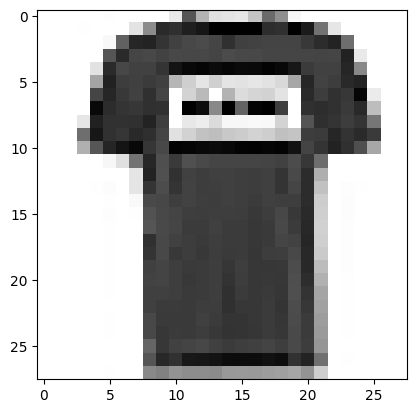

In [4]:
# Visualize an image from data
print("Label: ", y_train_full[1])
plt.imshow(X_train_full[1], cmap='Greys')
plt.show()

In [5]:
# Shape and datatype of X_train
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
# Split into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=123)
X_train.shape, X_val.shape

((48000, 28, 28), (12000, 28, 28))

In [7]:
# Reshape train, test, and validation data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_train.shape, X_val.shape, X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

First, we need to build the generator and the discriminator. The generator is similar to an autoencoder’s decoder, and the discriminator is a regular binary classifier (it takes an image as input and ends with a Dense layer containing a single unit and using the sigmoid activation function). For the second phase of each training iteration, we also need the full GAN model containing the generator followed by the discriminator.

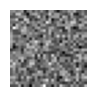

In [8]:
codings_size = 30
generator = keras.models.Sequential([
 keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
 keras.layers.Dense(150, activation="selu"),
 keras.layers.Dense(28 * 28, activation="sigmoid"),
 keras.layers.Reshape([28, 28, 1])
])


def show(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

noise = tf.random.normal(shape=[1, codings_size])
generated_images = generator(noise, training=False)
show(generated_images,1)

In [9]:
discriminator = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28, 1]),
 keras.layers.Dense(150, activation="selu"),
 keras.layers.Dense(100, activation="selu"),
 keras.layers.Dense(1, activation="sigmoid")
])

decision = discriminator(generated_images)
print(decision)


tf.Tensor([[0.2297577]], shape=(1, 1), dtype=float32)


In [10]:
gan = keras.models.Sequential([generator, discriminator])

Next, we need to compile these models. As the discriminator is a binary classifier, we can naturally use the binary cross-entropy loss. The generator will only be trained through the gan model, so we do not need to compile it at all. The gan model is also a binary classifier, so it can use the binary cross-entropy loss. Importantly, the discriminator should not be trained during the second phase, so we make it non-trainable before compiling the gan model:

In [11]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

Since the training loop is unusual, we cannot use the regular fit() method. Instead, we will write a custom training loop. For this, we first need to create a Dataset to iterate through the images:

In [12]:
batch_size = 300
# This dataset fills a buffer with buffer_size elements,
#then randomly samples elements from this buffer, replacing the selected elements with new elements.
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
#Combines consecutive elements of this dataset into batches.
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)
#Creates a Dataset that prefetches elements from this dataset


print(dataset)

<_PrefetchDataset element_spec=TensorSpec(shape=(300, 28, 28, 1), dtype=tf.uint8, name=None)>


We are now ready to write the training loop. Let’s wrap it in a `train_gan()` function:

In [13]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        for X_batch in dataset:
            # Phase 1 - Training the Discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise, training=True) # Set training=True

            # Convert X_batch to float32 if necessary
            if X_batch.dtype != tf.float32:
                X_batch = tf.cast(X_batch, tf.float32)

            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)


            # discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)

            # Phase 2 - Training the Generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)


            # discriminator.trainable = False
            gan.train_on_batch(noise, y2)

* In phase one we feed Gaussian noise to the generator to produce fake images,
and we complete this batch by concatenating an equal number of real images.
The targets y1 are set to 0 for fake images and 1 for real images. Then we train
the discriminator on this batch. Note that we set the discriminator’s trainable
attribute to True: this is only to get rid of a warning that Keras displays when it notices that trainable is now False but was True when the model was compiled (or vice versa).
* In phase two, we feed the GAN some Gaussian noise. Its generator will start by
producing fake images, then the discriminator will try to guess whether these
images are fake or real. We want the discriminator to believe that the fake images are real, so the targets y2 are set to 1.

**Note:** We set the trainable attribute to False, once again to avoid a warning.

<font color='blue'>**Discussion 1:** Given a distribution, what can we say about how hard it will be for a GAN to model that distribution? <font>
    
Are there distributions that a GAN can never learn to model? Are there distributions that are learnable for a GAN in principle, but are not efficiently learnable, for some reasonable model of resource-consumption? Are the answers to these questions actually any different for GANs than they are for other generative models?
    
* Synthetic Datasets - We can study synthetic datasets to probe what traits affect learnability. Synthetic datasets can even be parameterized by quantities of interest, such as connectedness or smoothness, allowing for systematic study.

* Modify Existing Theoretical Results - We can take existing theoretical results and try to modify the assumptions to account for different properties of the dataset. For instance, we could take results about GANs that apply given unimodal data distributions and see what happens to them when the data distribution becomes multi-modal.


### Deep Convolutional GANs or DCGANs

Many researchers tried to build GANs based on deeper convolutional nets for larger images. This proved to be tricky, as training was very unstable, but Alec Radford et al. finally succeeded in late 2015, after experimenting with many different architectures and hyperparameters. They called their architecture deep convolutional GANs (DCGANs). Here are the main guidelines they proposed for building stable convolutional GANs:

Replace any pooling layers with strided convolutions (in the discriminator) and
transposed convolutions (in the generator).

* Use Batch Normalization in both the generator and the discriminator, except in
the generator’s output layer and the discriminator’s input layer.
* Remove fully connected hidden layers for deeper architectures.
* Use ReLU activation in the generator for all layers except the output layer, which should use tanh.
* Use leaky ReLU activation in the discriminator for all layers.

These guidelines will work in many cases, but not always, so you may still need to experiment with different hyperparameters (in fact, just changing the random seed and training the same model again will sometimes work). For example, here is a small DCGAN that works reasonably well with MNIST dataset:



#### Load and prepare the dataset

You will use the MNIST dataset to train the generator and the discriminator. The generator will generate handwritten digits resembling the MNIST data.

In [14]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [16]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [17]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

#### Create the models

Both the generator and discriminator are defined using the [Keras Sequential API](https://www.tensorflow.org/guide/keras#sequential_model).

##### The Generator

The generator uses `tf.keras.layers.Conv2DTranspose` (upsampling) layers to produce an image from a seed (random noise). Start with a `Dense` layer that takes this seed as input, then upsample several times until you reach the desired image size of 28x28x1. Notice the `tf.keras.layers.LeakyReLU` activation for each layer, except the output layer which uses `tanh`.

In [18]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

Use the (as yet untrained) generator to create an image.

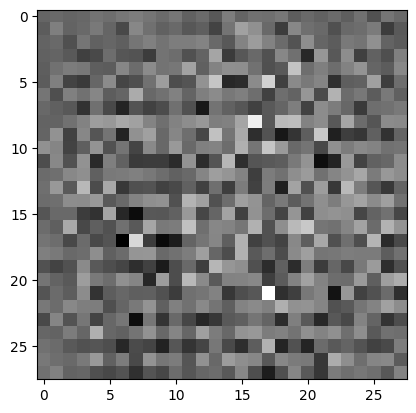

In [19]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

##### The Discriminator

The discriminator is a CNN-based image classifier.

In [20]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.



In [21]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)


tf.Tensor([[-0.0026463]], shape=(1, 1), dtype=float32)


##### Define the loss and optimizers

Define loss functions and optimizers for both models.

In [22]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

##### Discriminator loss

This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [23]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

##### Generator loss
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, compare the discriminators decisions on the generated images to an array of 1s.


In [24]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since you will train two networks separately.

In [25]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

##### Save checkpoints
This notebook also demonstrates how to save and restore models, which can be helpful in case a long running training task is interrupted.

In [26]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

##### Define the training loop


In [27]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The train_step function is being used for training loop that begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.


In [28]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

**Generate and save images**

In [29]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [30]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

#### Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated images look like random noise. As training progresses, the generated digits will look increasingly real. After about 50 epochs, they resemble MNIST digits. This may take about one minute / epoch with the default settings on Colab.


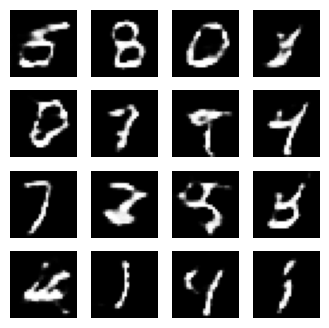

In [31]:
train(train_dataset, EPOCHS) # on GPU, it will take around 12 minutes

<font color='blue'>**Discussion 2:** How can we get realistic images here? <font>

If we scale up the above architecture and train it on a large dataset for example of faces, we can get fairly realistic images. In fact, DCGANs can learn quite meaningful latent representation. As we can see in Figure 2 below: many images were generated, and nine of them were picked manually (top left), including three representing men with glasses, three men without glasses, and three women without glasses. For each of these categories, the codings that were used to generate the images were averaged, and an image was generated based on the resulting mean codings (lower left). In short, each of the three lower-left images represents the mean of the three images located above it. But this is not a simple mean computed at the pixel level (this would result in three overlapping faces), it is a mean computed in the latent space, so the images still look like normal faces. Amazingly, if we compute men with glasses, minus men without glasses, plus women without glasses—where each term corresponds to one of the mean codings and we generate the image that corresponds to this coding, we get the image at the center of the 3 × 3 grid of faces on the right: a woman with glasses.
    
![Image](https://i.ibb.co/tBhgNmF/M5-5.jpg)

${\text{Figure 2: Vector arithmetic for visual concepts}}$

Most improvement has been made to discriminator models in an effort to train more effective generator models, although less effort has been put into improving the generator models.

### Theory Questions

1. Can you name few tasks where GANs can shine?

Answer:

**1. GANs for Image Editing**

Using GANs, we can reconstruct images and attempt to change the appearance drastically.

![Image](https://machinelearningmastery.com/wp-content/uploads/2019/06/Example-of-Face-Photo-Editing-with-IcGAN-1024x276.png)

**2. Using GANs for Security**

A constant concern of industrial applications is that they should be robust to cyber attacks. GANs are proving to be of immense help here, directly addressing the concern of “adversarial attacks”.

These adversarial attacks use a variety of techniques to fool deep learning architectures. GANs are used to make existing deep learning models more robust to these techniques. How? By creating more such fake examples and training the model to identify them. A technique called SSGAN is used to do steganalysis of images and detect harmful encodings which shouldn’t have been there.

**3. Generating Data with GANs**

GANs shine again as they can be used to generate synthetic data for supervision. We know where to go next time we need more data.

You can refer to this [paper](https://arxiv.org/pdf/1612.07828.pdf) to explore the creation of synthetic data with the help of GANs.


2. What are the main difficulties when training GANs?

Answer: It would seem that you just need to train the GAN for long enough, and it will eventually reach this equilibrium, giving you a perfect generator. Unfortunately, it’s not that simple: nothing guarantees that the equilibrium will ever be reached.

* The biggest difficulty is called mode collapse: this is when the generator’s outputs gradually become less diverse. How can this happen? Suppose that the generator gets better at producing convincing shoes than any other class. It will fool the discriminator a bit more with shoes, and this will encourage it to produce even more images of shoes. Gradually, it will forget how to produce anything else. Meanwhile, the only fake images that the discriminator will see will be shoes, so it will also forget how to discriminate fake images of other classes. Eventually, when the discriminator manages to discriminate the fake shoes from the real ones, the generator will be forced to move to another class. It may then become good at shirts, forgetting about shoes, and the discriminator will follow. The GAN may gradually cycle across a few classes, never really becoming very good at any of them.

* Moreover, because the generator and the discriminator are constantly pushing against each other, their parameters may end up oscillating and becoming unstable. Training may begin properly, then suddenly diverge for no apparent reason, due to these instabilities. And since many factors affect these complex dynamics, GANs are very sensitive to the hyperparameters: you may have to spend a lot of effort fine-tuning them.

In short, this is still a very active field of research, and the dynamics of GANs are still not perfectly understood.


### Please answer the questions below to complete the experiment:




In [32]:
#@title The generator uses `tf.keras.layers.Conv2DTranspose` (upsampling) layers to produce an image from { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "a seed (random noise)" #@param ["", "an array of ones", "an exponential function", "a set of finite and deterministic values", "a seed (random noise)"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")